In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./kc_house_data.csv")

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [29]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [30]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [31]:
df = df.drop(columns=['date'])

print(df.columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [32]:
print(df.columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


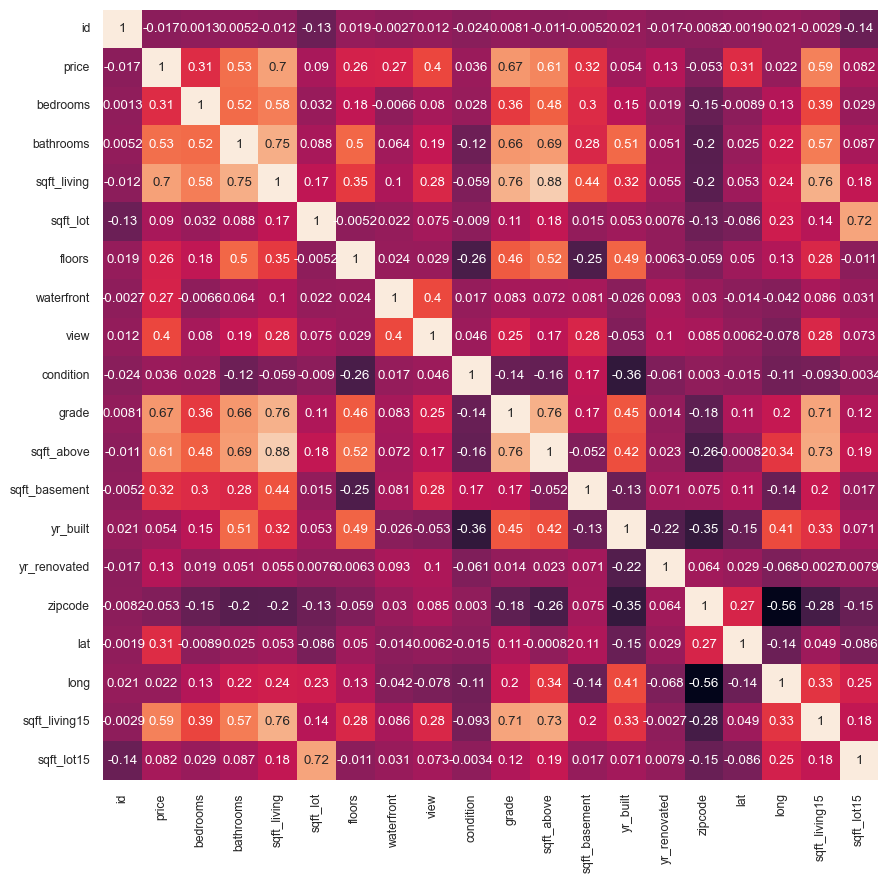

In [33]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

데이터가 모자라기 때문에 처음에는 date를 제외한 모든 값을 넣고 진행 <br>
두 번째에는 bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_above, lat, sqft_living15 이 값만 X에 넣고 해보겠음

In [34]:
y = df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [35]:
X = df.drop(['price', 'id'], axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
X = X.values

X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((17290, 18), (17290,), (4323, 18), (4323,))

분류는 model.add(Dense(1)) 이 부분을 맞춰야 했지만 회귀이기 때문에 1로 지정<br>
-> 회귀는 숫자 하나를 예측하기 때문

In [39]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(18,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

c:\Users\syjwk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,383 (5.40 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)

Epoch 1/20


541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 297132326912.0000 - mse: 297132326912.0000 - val_loss: 108238151680.0000 - val_mse: 108238151680.0000
Epoch 2/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 118807617536.0000 - mse: 118807617536.0000 - val_loss: 102252535808.0000 - val_mse: 102252535808.0000
Epoch 3/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 123328004096.0000 - mse: 123328004096.0000 - val_loss: 87787560960.0000 - val_mse: 87787560960.0000
Epoch 4/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 93694410752.0000 - mse: 93694410752.0000 - val_loss: 58960003072.0000 - val_mse: 58960003072.0000
Epoch 5/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 62455623680.0000 - mse: 62455623680.0000 - val_loss: 52984815616.0000 - val_mse: 52984815616.0000
Epoch 6/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 61633605632.0000 - mse: 61633605632.0000 - val_loss: 52189687808.0000 - val_mse: 52189687808.0000
Epoch 7/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step -

mse가 예측과 실제값의 차이를 제곱하는데 price의 범위가 큰 수여서 값이 커졌다. 

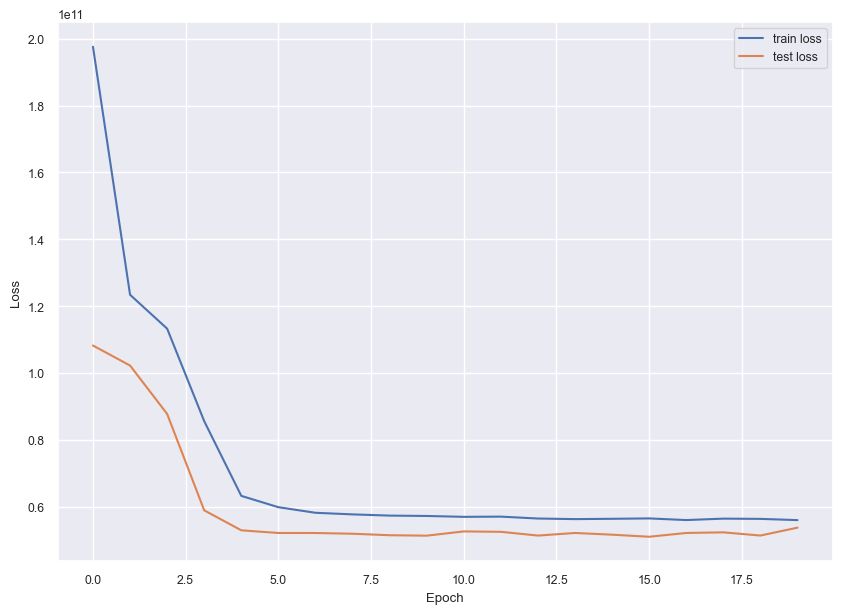

In [41]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(20), history.history['loss'], label='train loss')
plt.plot(range(20), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 55658303488.0000 - mse: 55658303488.0000


[53788815360.0, 53788815360.0]

bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_above, lat, sqft_living15을 X에 넣고 진행

In [43]:
selected_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
    'view', 'grade', 'sqft_above', 'lat', 'sqft_living15'
]

X = df[selected_features]

X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,47.6168,1800


In [44]:
y = df['price']

y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [45]:
X = X.values

X

array([[3.00000e+00, 1.00000e+00, 1.18000e+03, ..., 1.18000e+03,
        4.75112e+01, 1.34000e+03],
       [3.00000e+00, 2.25000e+00, 2.57000e+03, ..., 2.17000e+03,
        4.77210e+01, 1.69000e+03],
       [2.00000e+00, 1.00000e+00, 7.70000e+02, ..., 7.70000e+02,
        4.77379e+01, 2.72000e+03],
       ...,
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 1.02000e+03,
        4.75944e+01, 1.02000e+03],
       [3.00000e+00, 2.50000e+00, 1.60000e+03, ..., 1.60000e+03,
        4.75345e+01, 1.41000e+03],
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 1.02000e+03,
        4.75941e+01, 1.02000e+03]])

In [46]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((17290, 10), (17290,), (4323, 10), (4323,))

In [48]:
model = Sequential()

model.add(Dense(8,input_shape=(10,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

c:\Users\syjwk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)

Epoch 1/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 328996782080.0000 - mse: 328996782080.0000 - val_loss: 66241355776.0000 - val_mse: 66241355776.0000
Epoch 2/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83459506176.0000 - mse: 83459506176.0000 - val_loss: 66157268992.0000 - val_mse: 66157268992.0000
Epoch 3/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 73963298816.0000 - mse: 73963298816.0000 - val_loss: 65166020608.0000 - val_mse: 65166020608.0000
Epoch 4/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72755961856.0000 - mse: 72755961856.0000 - val_loss: 64931438592.0000 - val_mse: 64931438592.0000
Epoch 5/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72236728320.0000 - mse: 72236728320.0000 - val_loss: 64369623040.0000 - val_mse: 64369623040.0000
Epoch 6/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71425859584.0000 - mse: 71425859584.0000 - val_loss: 64358191104.0000 - val_mse: 64358191104.0000
Epoch 7/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

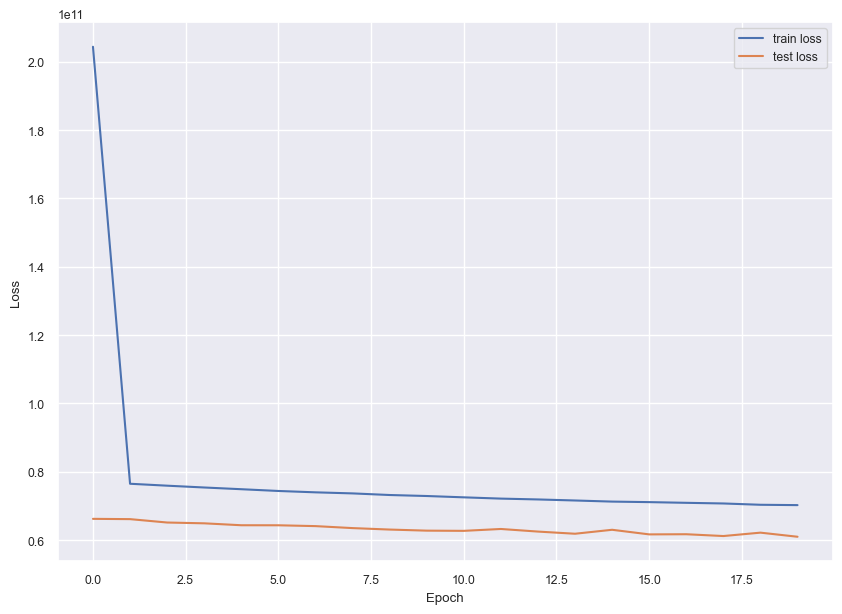

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(20), history.history['loss'], label='train loss')
plt.plot(range(20), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 65471373312.0000 - mse: 65471373312.0000


[61002063872.0, 61002063872.0]

데이터가 적어서 좋은 결과가 도출되지 않을 줄 알았지만 학습이 더 잘 되었다.